In [15]:
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns
from normalize import *
from annotate import categorize_cogdx
from plotmodules.norm_plots import generate_clustermap
from plotmodules.pca_plots import *
from test_model import test_abundance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ROSMAP_PATH = 'ROSMAP_clinical.csv'
CT_COUNTS_META_PATH = 'ct_counts_public_meta.h5ad'

ROSMAP_data = pd.read_csv(ROSMAP_PATH)
ct_counts_metadata: ad.AnnData = ad.read_h5ad(CT_COUNTS_META_PATH)

ROSMAP_data = ROSMAP_data.convert_dtypes()
ct_counts_metadata.obs = ct_counts_metadata.obs.convert_dtypes()

In [16]:
normalize_tmm(ct_counts_metadata)
cogdx_map = {1: 'H', 2: 'M', 3: 'M', 4: 'AD', 5: 'AD', 6: 'O'}
categorize_cogdx(ct_counts_metadata, cogdx_map)

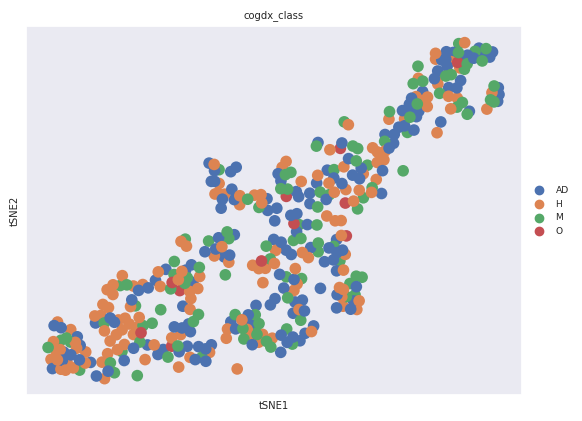

In [17]:
pca_comps = 9
sc.pp.pca(ct_counts_metadata, n_comps=pca_comps, layer='norm')
sc.tl.tsne(ct_counts_metadata, 2)
sc.pl.tsne(ct_counts_metadata, color='cogdx_class')

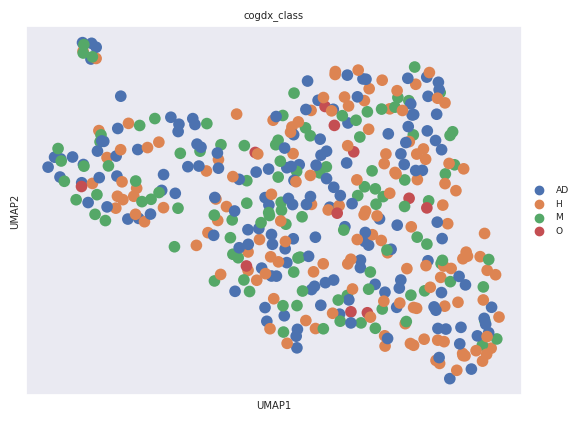

In [18]:
sc.pp.neighbors(ct_counts_metadata)
sc.tl.umap(ct_counts_metadata)
sc.pl.umap(ct_counts_metadata, color='cogdx_class')

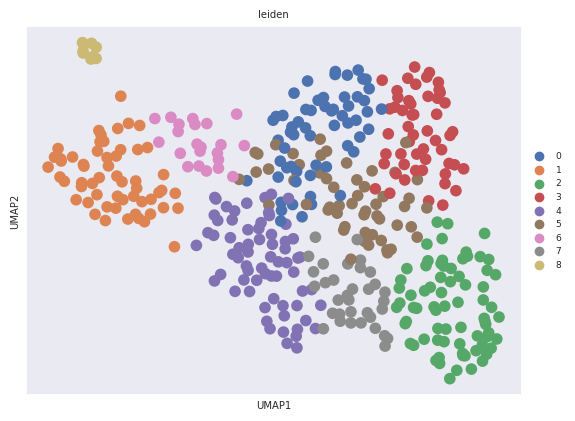

In [19]:
# Cluster
sc.tl.leiden(ct_counts_metadata,flavor="igraph", n_iterations=4)
sc.pl.umap(ct_counts_metadata, color=["leiden"])

In [23]:
ct_counts_metadata.obs['leiden'] = ct_counts_metadata.obs['leiden'].astype('Int64')
contingency = ct_counts_metadata.obs['cogdx_class'][ct_counts_metadata.obs['leiden'] == 5].value_counts()[['H', 'M', 'AD']]
contingency

cogdx_class
H     15
M     11
AD    23
Name: count, dtype: int64

In [24]:
from scipy.stats import chisquare

res = chisquare(contingency)
res.pvalue

0.10170139230422684

/home/jacob/Documents/BEP/bsc-thesis-scripts/.venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


/home/jacob/Documents/BEP/bsc-thesis-scripts/.venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


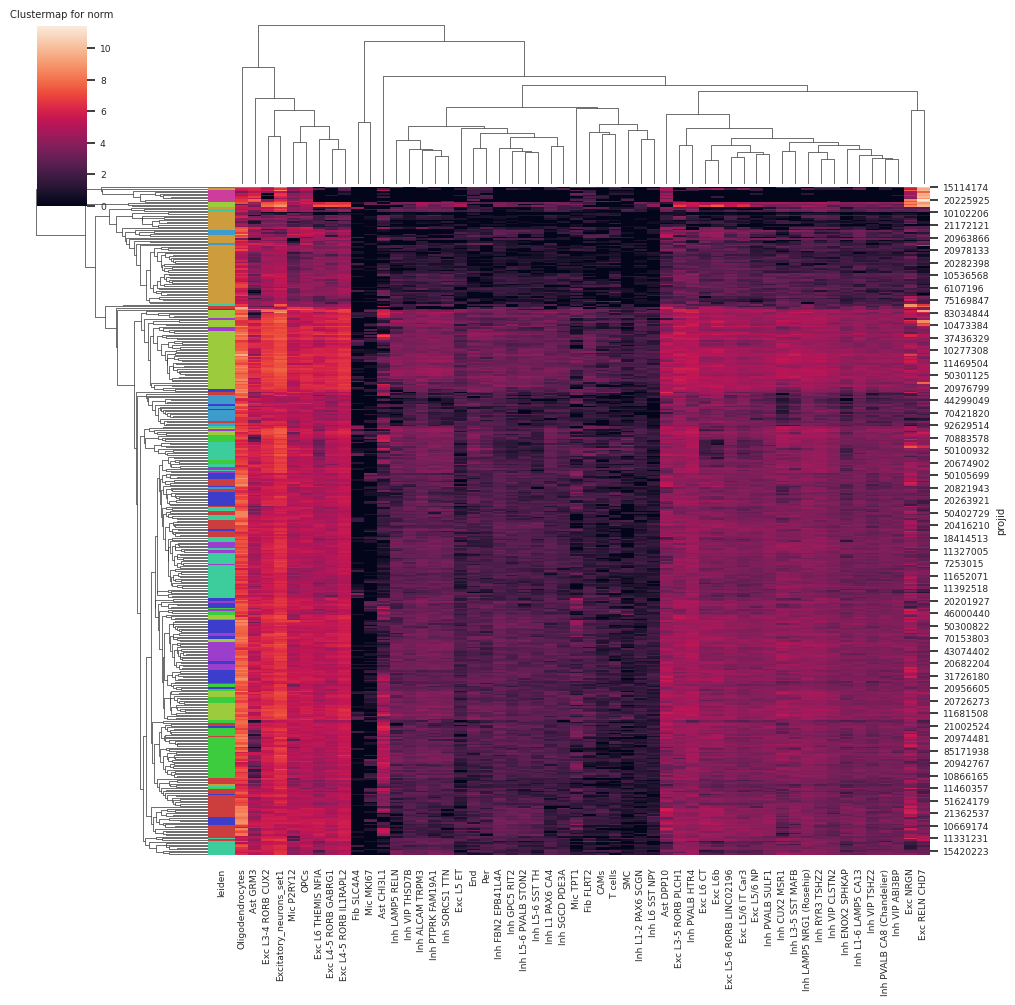

In [22]:
generate_clustermap(ct_counts_metadata, 'norm', color_by='leiden')